# ASI assessed exercise 2016/2017

Giulio Collura

In this homework the MNIST and CIFAR10 datasets available to download from:
* http://yann.lecun.com/exdb/mnist/
* https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Fira Sans'
np.seterr(divide='ignore', invalid='ignore')

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def read_mnist(dataset='training', path='.'):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    From: https://gist.github.com/akesling/5358964
    """
    import os, struct

    if dataset is 'training':
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset is 'testing':
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    return list(zip(lbl, img))

In [2]:
mnist_train = read_mnist('training')
mnist_test = read_mnist('testing')

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
for ax, (label, image) in zip(axes.flat, mnist_train[:8]):
    ax.imshow(image, cmap='gray')
    ax.set_title(label)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './train-labels.idx1-ubyte'

Categories: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


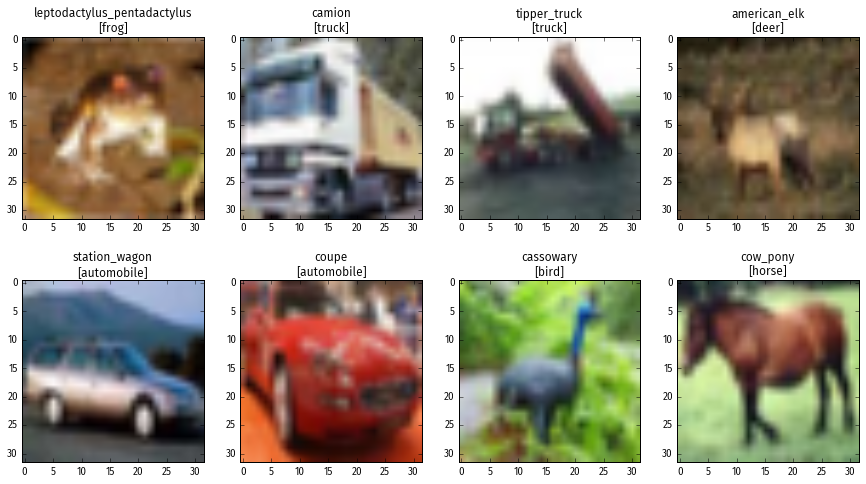

In [3]:
cifar_data_1 = unpickle('cifar-10-batches-py/data_batch_1')
cifar_test = unpickle('cifar-10-batches-py/test_batch')
cifar_categories = unpickle('cifar-10-batches-py/batches.meta')[b'label_names']

print('Categories:', [cat.decode() for cat in cifar_categories])

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
for ax, data, cat_id, filename in zip(axes.flat,
                                      cifar_data_1[b'data'][:8],
                                      cifar_data_1[b'labels'][:8],
                                      cifar_data_1[b'filenames'][:8]):
    ax.set_title('%s\n[%s]' % (filename.decode()[:-13], cifar_categories[cat_id].decode()))
    ax.imshow(data.reshape(3, 32, 32).swapaxes(0, 2).swapaxes(0, 1))
plt.show()

## Dataset analysis

### Mnist

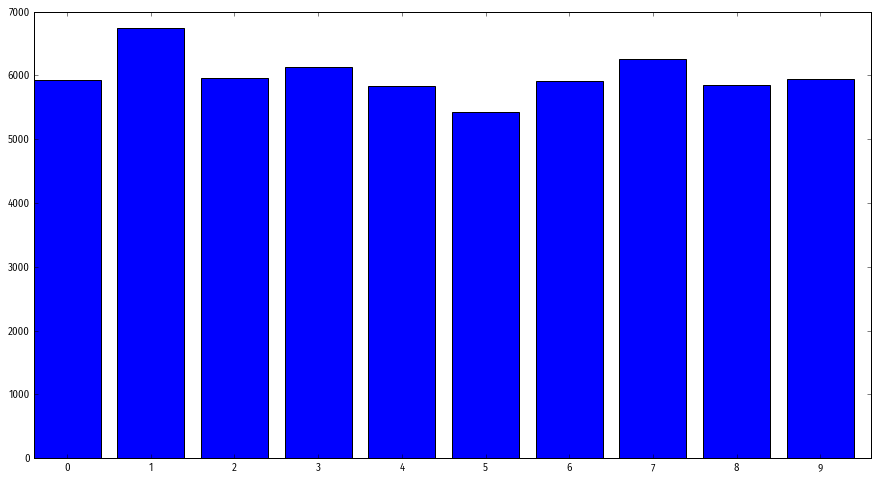

In [4]:
mnist_labels = [x[0] for x in mnist_train]
mnist_labels_hist = np.histogram(mnist_labels, bins=range(11))

fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(mnist_labels_hist[1][:-1], mnist_labels_hist[0])
ax.set_xticks(mnist_labels_hist[1][:-1] + 0.4)
ax.set_xticklabels(np.arange(0, 10))
plt.show()

<div class='alert alert-success'></div>

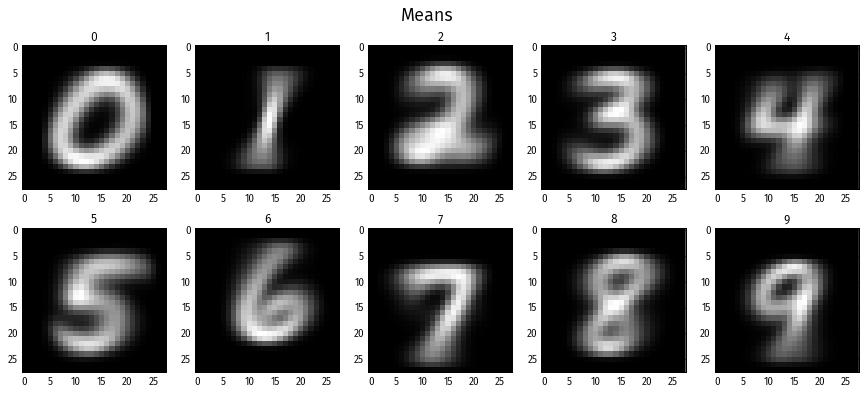

In [5]:
mnist_means = [np.array([x[1] for x in mnist_train if x[0] == i]).mean(axis=0) for i in range(10)]

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Means', fontsize=18)
for ax, label, image in zip(axes.flat, range(10), mnist_means):
    ax.imshow(image, cmap='gray', interpolation='none')
    ax.set_title(label)
plt.show()

<div class='alert alert-success'></div>

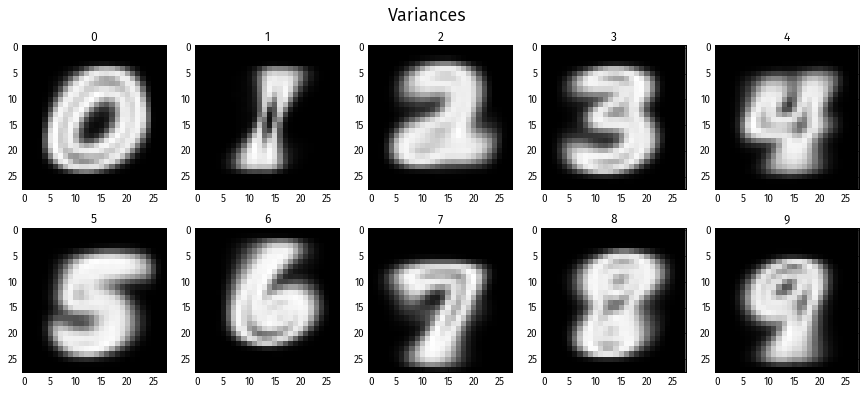

In [6]:
mnist_vars = [np.array([x[1] for x in mnist_train if x[0] == i]).var(axis=0) for i in range(10)]

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Variances', fontsize=18)
for ax, label, image in zip(axes.flat, range(10), mnist_vars):
    ax.imshow(image, cmap='gray', interpolation='none')
    ax.set_title(label)
plt.show()

<div class='alert alert-success'></div>

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 

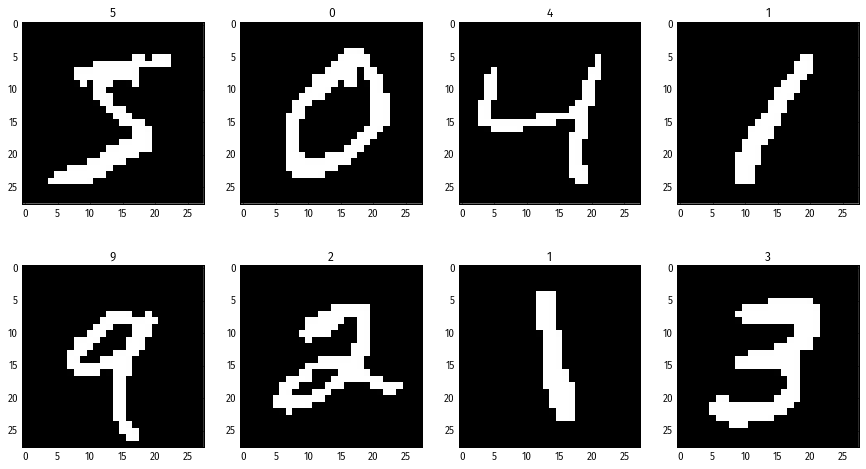

In [7]:
mnist_train_discrete = [(label, image // 128) for label, image in mnist_train]
mnist_test_discrete = [(label, image // 128) for label, image in mnist_test]

print(mnist_train_discrete[0][1])

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
for ax, (label, image) in zip(axes.flat, mnist_train_discrete[:8]):
    ax.imshow(image, cmap='gray', interpolation='none')
    ax.set_title(label)
plt.show()

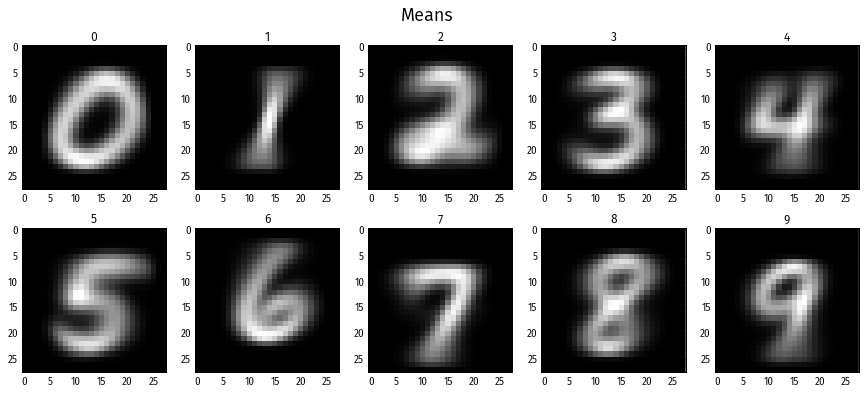

In [8]:
mnist_means_discrete = [np.mean([x[1] for x in mnist_train_discrete if x[0] == i], axis=0) for i in range(10)]

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Means', fontsize=18)
for ax, label, image in zip(axes.flat, range(10), mnist_means_discrete):
    ax.imshow(image, cmap='gray', interpolation='none')
    ax.set_title(label)
plt.show()

<div class='alert alert-success'></div>

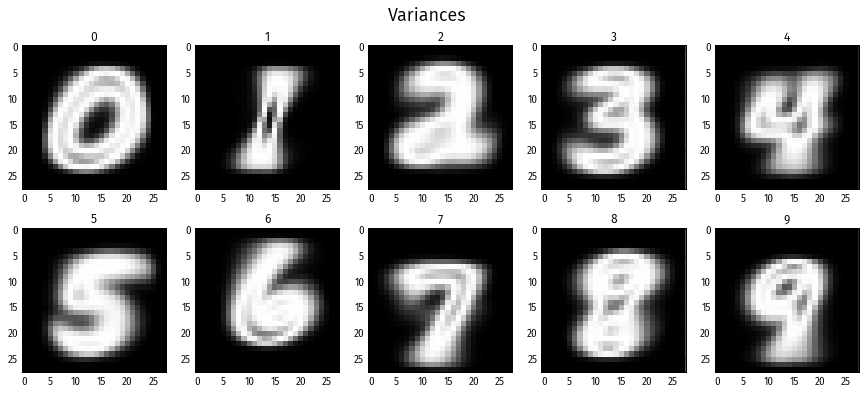

In [9]:
mnist_vars_discrete = [np.var([x[1] for x in mnist_train_discrete if x[0] == i], axis=0) for i in range(10)]

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Variances', fontsize=18)
for ax, label, image in zip(axes.flat, range(10), mnist_vars_discrete):
    ax.imshow(image, cmap='gray', interpolation='none')
    ax.set_title(label)
plt.show()

### CIFAR

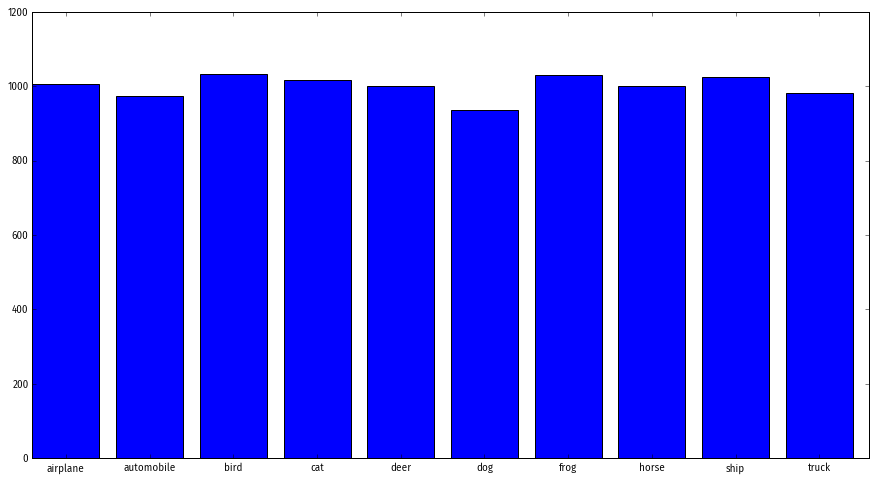

In [10]:
cifar_labels = cifar_data_1[b'labels']
cifar_labels_hist = np.histogram(cifar_labels, bins=range(len(cifar_categories) + 1))

fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(cifar_labels_hist[1][:-1], cifar_labels_hist[0])
ax.set_xticks(cifar_labels_hist[1][:-1] + 0.4)
ax.set_xticklabels([cifar_categories[cat_id].decode() for cat_id in cifar_labels_hist[1][:-1]])
plt.show()

<div class='alert alert-success'></div>

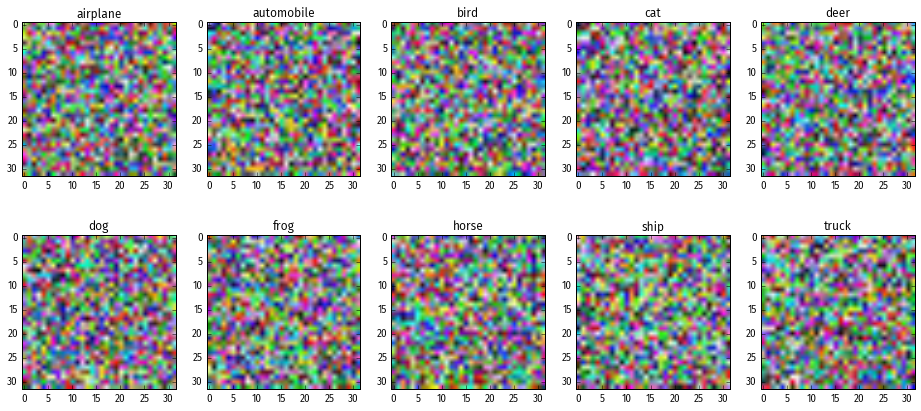

In [11]:
cifar_means = [
    np.mean([data for data, label in zip(cifar_data_1[b'data'], cifar_data_1[b'labels']) if label == i], axis=0)
    for i in range(len(cifar_categories))
]

fig, axes = plt.subplots(2, 5, figsize=(16, 7))
for ax, mean, category in zip(axes.flat, cifar_means, cifar_categories):
    ax.set_title(category.decode())
    ax.imshow(mean.reshape(3, 32, 32).swapaxes(0, 2).swapaxes(0, 1))
plt.show()

<div class='alert alert-success'></div>

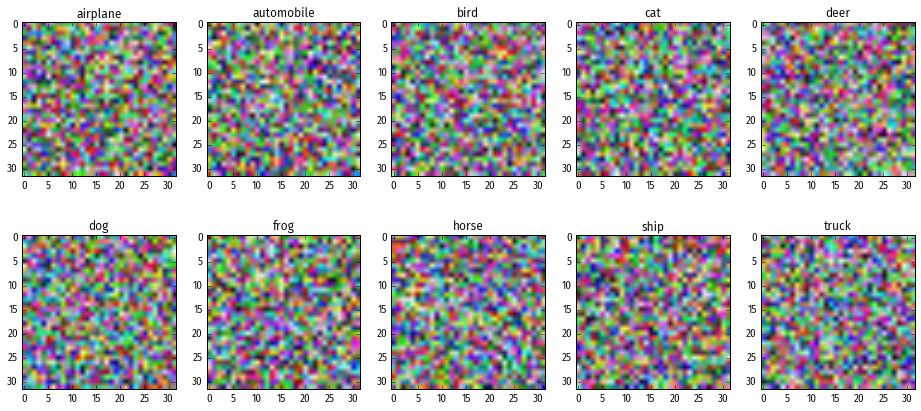

In [12]:
cifar_vars = [
    np.var([data for data, label in zip(cifar_data_1[b'data'], cifar_data_1[b'labels']) if label == i], axis=0)
    for i in range(len(cifar_categories))
]

fig, axes = plt.subplots(2, 5, figsize=(16, 7))
for ax, var, category in zip(axes.flat, cifar_vars, cifar_categories):
    ax.set_title(category.decode())
    ax.imshow(var.reshape(3, 32, 32).swapaxes(0, 2).swapaxes(0, 1))
plt.show()

## Naive Bayes classifier

### Code implementation

\begin{equation}
    P(t_{new} = k | x_{new}, \mathbf{X}, \mathbf{t}) = \frac{p(x_{new}|t_{new} = k, \mathbf{X}, \mathbf{t})P(t_{new} = k)}{\sum_{j}p(x_{new}|t_{new} = j, \mathbf{X}, \mathbf{t})P(t_{new} = j)}
\end{equation}

In [313]:
def log_gaussian(x, m, v):
    """
    Optimized Gaussian function calculation at a given point, given mean and variance
    """
    return -0.5 * np.log(2 * np.pi * v) + (-(x - m)**2 / (2 * v))

def probability(x, mean, variance):
    """
    Calculate the probability using np.log to ease calculations
    """
    return np.sum([log_gaussian(x_i, m, v if v > 0 else 1e-10)
                   for x_i, m, v in zip(x, mean, variance)])

def likelihood(x, means, variances):
    return np.array([probability(x, mean, var) for mean, var in zip(means, variances)])

def predictions(x, prior, means, variances):
    pred = likelihood(x, means, variances) * prior
    return pred / pred.sum()

def predict(x, prior, means, variances):
    return np.argmin(predictions(x, prior, means, variances))

def accuracy(prediction):
    return np.sum([p[0] == p[1] for p in prediction]) / len(prediction)

def prior_means_vars(train_data, N):
    """
    @return prior p(t_new = k)
    @return means for each class
    @return variances for each class
    """
    p = np.zeros(N)
    m = np.zeros(N, dtype=object)
    v = np.zeros(N, dtype=object)
    for i in np.arange(N):
        p[i] = np.sum([x[0] == i for x in train_data]) / len(train_data)
        m[i] = np.mean([x[1] for x in train_data if x[0] == i], axis=0)
        v[i] = np.std([x[1] for x in train_data if x[0] == i], axis=0, ddof=1)
    return p, m, v

### Mnist - Data preparation

We calculate $\mu$, $\sigma^2$ and $p(t = k)$ for all possible classes.

In [314]:
mnist_train_norm = [(label, x.flatten()) for label, x in mnist_train]
mnist_test_norm = [(label, x.flatten()) for label, x in mnist_test]

N = 10 # number of digits, this value can be hard-coded

mnist_prior, mnist_means, mnist_vars = prior_means_vars(mnist_train_norm, N)

In [315]:
mnist_pred = [(predict(x_new, mnist_prior, mnist_means, mnist_vars), t_new)
        for t_new, x_new in mnist_test_norm]
print('Accuracy Naive-Bayes: %.2f%%' % (accuracy(mnist_pred) * 100))

Accuracy Naive-Bayes: 82.85%


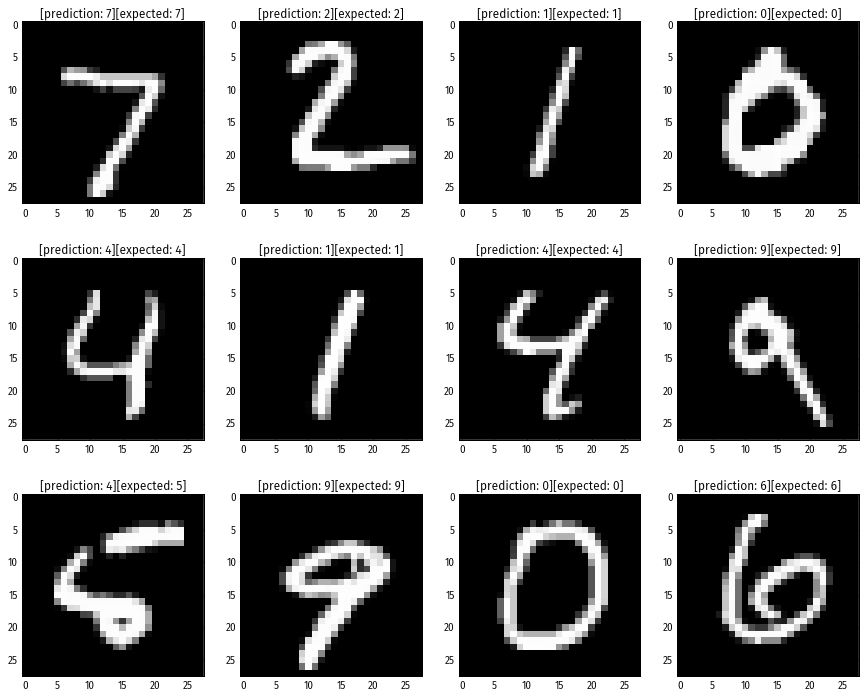

In [316]:
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
for ax, (_, image), (prediction, expected) in zip(axes.flat, mnist_test[:12], mnist_pred[:12]):
    ax.set_title('[prediction: %s][expected: %s]' % (prediction, expected))
    ax.imshow(image.reshape(28, 28), cmap='gray', interpolation='none')
plt.show()

### Mnist - Data discretization

In [317]:
mnist_train_discrete = [(label, (x // 128).flatten() * 255) for label, x in mnist_train]
mnist_test_discrete = [(label, (x // 128).flatten() * 255) for label, x in mnist_test]

N = 10

mnist_prior_discrete, mnist_means_discrete, mnist_vars_discrete = prior_means_vars(mnist_train_discrete, N)

In [318]:
mnist_discrete_pred = [(predict(x_new, mnist_prior_discrete, mnist_means_discrete, mnist_vars_discrete), t_new)
        for t_new, x_new in mnist_test_discrete]
print('Accuracy Naive-Bayes (with discretization): %.2f%%' % (accuracy(mnist_discrete_pred) * 100))

Accuracy Naive-Bayes (with discretization): 82.36%


<div class='alert alert-success'></div>

### CIFAR-10 - Data preparation

In [306]:
def gaussian(x, m, v):
    """
    Calculate the value of the Gaussian function at a given point, given mean and variance
    """
    return 1 / np.sqrt(2 * np.pi * v) * np.exp(-(x - m)**2 / (2 * v))

def probability(x, m, v):
    """
    Calculate the probability
    """
    return np.prod([gaussian(x_i, m_i, v_i) for x_i, m_i, v_i in zip(x.flat, m.flat, v.flat) if v_i != 0])

def likelihood(x, means, variances):
    return np.array([probability(x, mean, var) for mean, var in zip(means, variances)])

def predictions(x, prior, means, variances):
    pred = likelihood(x, means, variances) * prior
    return pred / pred.sum()

def predict(x, prior, means, variances):
    return np.argmax(predictions(x, prior, means, variances))

def accuracy(prediction):
    return np.sum([p[0] == p[1] for p in prediction]) / len(prediction)

def prior_means_vars(train_data, N):
    """
    @return prior p(t_new = k)
    @return means for each class
    @return variances for each class
    """
    p = np.zeros(N)
    m = np.zeros(N, dtype=object)
    v = np.zeros(N, dtype=object)
    for i in np.arange(N):
        p[i] = np.sum([x[0] == i for x in train_data]) / len(train_data)
        m[i] = np.mean([x[1] for x in mnist_train_norm if x[0] == i], axis=0)
        v[i] = np.var([x[1] for x in mnist_train_norm if x[0] == i], axis=0)
    return p, m, v

In [309]:
cifar_train_norm = [(label, x / 255) for label, x in zip(cifar_data_1[b'labels'], cifar_data_1[b'data'])]
cifar_test_norm = [(label, x / 255) for label, x in zip(cifar_test[b'labels'], cifar_test[b'data'])]

N = len(cifar_categories)

cifar_prior, cifar_means, cifar_vars = prior_means_vars(cifar_train_norm, N)

In [310]:
cifar_pred = [(predict(x_new, cifar_prior, cifar_means, cifar_vars), t_new) 
              for t_new, x_new in cifar_test_norm]
print('Accuracy Naive-Bayes: %.2f%%' % (accuracy(cifar_pred) * 100))

Accuracy Naive-Bayes: 10.00%


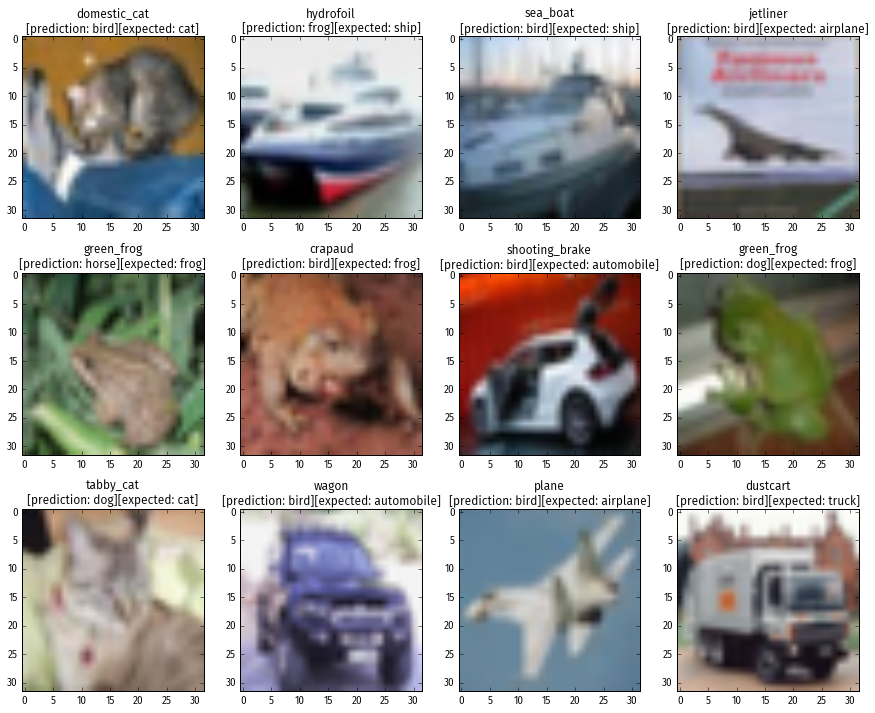

In [298]:
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
for ax, data, filename, (prediction, expected) in zip(axes.flat, cifar_test[b'data'][:12],
                                                      cifar_test[b'filenames'][:12], cifar_pred[:12]):
    ax.set_title('%s\n[prediction: %s][expected: %s]' % (filename.decode()[:-13], cifar_categories[prediction].decode(), cifar_categories[expected].decode()))
    ax.imshow(data.reshape(3, 32, 32).swapaxes(0, 2).swapaxes(0, 1))
plt.show()

## Bayesian linear regression [Loss minimization]

### Code implementation

In [22]:
def get_design_matrix(x, k):
    return np.array([np.array([x_i**n for n in range(k + 1)]).flatten() for x_i in np.array(x)])

def get_w_hat(X, t):
    return np.dot(np.linalg.inv(X.T.dot(X) + np.diag(np.random.uniform(0, 1, X.T.shape[0]))), X.T.dot(t))

def get_predictions(x, t, x_test, k = 0):
    X = get_design_matrix(x, k)
    X_test = get_design_matrix(x_test, k)
    w_hat = get_w_hat(X, t)
    return X_test.dot(w_hat)

def get_variance(X, t, w_hat):
    A = t - X.dot(w_hat)
    return A.T.dot(A / t.size)

### Mnist

In [23]:
x = np.array([x[1].flatten() for x in mnist_train_norm])
t = np.array([x[0] for x in mnist_train_norm])
x_test = np.array([x[1].flatten() for x in mnist_test_norm])

In [25]:
predictions = get_predictions(x, t, x_test, 1)
mnist_pred = np.array([(int(pred), x[0]) for x, pred in zip(mnist_test_norm, predictions)])
print('Accuracy Bayesian Linear Regression (order %d): %.2f%%' % (1, accuracy(mnist_pred) * 100))

Accuracy Bayesian Linear Regression (order 1): 26.02%


In [26]:
for order in [1, 2, 3, 4]:
    predictions = get_predictions(x, t, x_test, order)
    mnist_pred = np.array([(int(pred), x[0]) for x, pred in zip(mnist_test_norm, predictions)])
    print('Accuracy Bayesian Linear Regression (order %d): %.2f%%' % (order, accuracy(mnist_pred) * 100))

Accuracy Bayesian Linear Regression (order 1): 25.98%
Accuracy Bayesian Linear Regression (order 2): 29.29%
Accuracy Bayesian Linear Regression (order 3): 29.35%
Accuracy Bayesian Linear Regression (order 4): 29.69%


### CIFAR-10

In [27]:
x = np.array([x[1] for x in cifar_train_norm])
t = np.array([x[0] for x in cifar_train_norm])
x_test = np.array([x[1] for x in cifar_test_norm])

In [28]:
predictions = get_predictions(x, t, x_test, 1)

In [29]:
cifar_pred = np.array([(int(pred), x[0]) for x, pred in zip(cifar_test_norm, predictions)])

In [30]:
print('Accuracy Bayesian Linear Regression: %.2f%%' % (accuracy(cifar_pred) * 100))

Accuracy Bayesian Linear Regression: 11.04%


In [31]:
cifar_pred

array([[4, 3],
       [4, 8],
       [6, 8],
       ..., 
       [6, 5],
       [6, 1],
       [5, 7]])